In [1]:
import pandas as pd
import os
from pathlib import Path
#data_path=Path('D:/research')
#print(data_path)
#filepath=D:\IntrusionDetection\research\KDD_Train.csv
#print(filepath)
df=pd.read_csv("KDD_Train.csv")


In [2]:
print(df.shape)
df.head(5)


(125973, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
#Assigning 0 for normal and 1 for anomaly.
df.replace(('normal','anomaly'), (0,1), inplace=True)
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [4]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.465417
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,0.498805
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#df.dropna(inplace=True)


In [6]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [7]:
#Finding columns that have string values.

for col_name in df.columns:
    #print(col_name)
    #print(df[col_name])
    if df[col_name].dtypes=='object':
        a=df[col_name].unique()
        a=len(a)
        print(col_name + " has "+str(a)+" unique values.")

protocol_type has 3 unique values.
service has 70 unique values.
flag has 11 unique values.


In [8]:
df['protocol_type'].value_counts()


tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [9]:
def dummy_df(df):
    todummylist=['protocol_type','service','flag']
    for x in todummylist:
        dummies=pd.get_dummies(df[x],dummy_na=False)
        df=df.drop(x,1)
        df=pd.concat([df,dummies],axis=1)
    return df

In [10]:
df=dummy_df(df)
df.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
column_names=list(df) 
print(column_names)
print(len(column_names))

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'icmp', 'tcp', 'udp', 'IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4

In [13]:
all_features=df[column_names].values
all_classes=df['class'].values

X = df.drop('class',1)
print(X.head())
print('-----')
y = df['class']
print(y.head())
#X.shape
#y.shape




   duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   num_failed_logins  logged_in  num_compromised ...  REJ  RSTO  RSTOS0  RSTR  \
0                  0          0                0 ...    0     0       0     0   
1                  0          0                0 ...    0     0       0     0   
2                  0          0                0 ...    0     0       0     0   
3                  0          1                0 ...    0     0       0     0   
4                  0          1                0 ...    0     0       0     0   

   S0  S1  S2  S3  SF  SH  
0   0   0   0   0   1   0  
1   0   0   0   0   1   

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
X_train,X_train_lr, y_train, y_train_lr = train_test_split(X_train,y_train,test_size=0.5)

In [15]:
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.models import Sequential
from sklearn.model_selection import cross_val_score
#import keras_metrics
print("Import Worked")
def create_model():
    model=Sequential()
    
    model.add(Dense(32,input_dim=122, kernel_initializer='normal', activation='relu'))
    print('1st layer')
    #Hidden layer
    model.add(Dense(16,kernel_initializer='normal',activation='relu'))
    #OUTPUT LAYER
    print("Hidden layer")
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    
    #COMPILE MODE
    print("Output layer")
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
 
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
print("About to start estimator")   

keras_model = create_model()
history = keras_model.fit(X_train,y_train,epochs=20, batch_size=50,verbose=1)


Import Worked
About to start estimator
1st layer
Hidden layer
Output layer
Epoch 1/20
31493/31493 [==============================] - 2s 57us/step - loss: 5.1477 - acc: 0.6769

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
#rf = RandomForestClassifier(max_depth=3, n_estimators=10)
#rf.fit(X_train, y_train)

#y_pred_rf = rf.predict_proba(X_test)[:, 1]
#fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
#auc_rf = auc(fpr_rf, tpr_rf)

In [17]:
from sklearn.metrics import classification_report
y_pred_keras = keras_model.predict(X_test)
#print(y_pred_keras)
#print(classification_report(y_test, y_pred_keras))




fpr_keras,tpr_keras,thresholds_keras=roc_curve(y_test,y_pred_keras)


auc_keras=auc(fpr_keras,tpr_keras)

In [18]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import LinearSVC


In [19]:
#lr = LogisticRegression()
#lr=lr.fit(X_train, y_train)

#y_predict =lr.predict(X_test)
#print(cross_val_score(lr, X_train, y_train, cv=3, scoring="accuracy"))

#y_scores = cross_val_predict(lr, X_train, y_train, cv=3, method="decision_function")
#y_pred_lr = lr.predict_proba(X_test)[:,1]
#fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_rf)
#auc_lr = auc(fpr_lr,tpr_lr)



C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


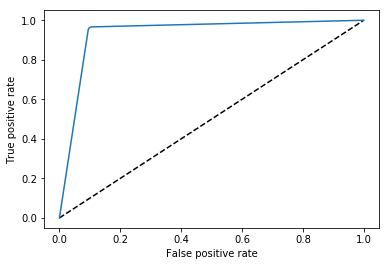

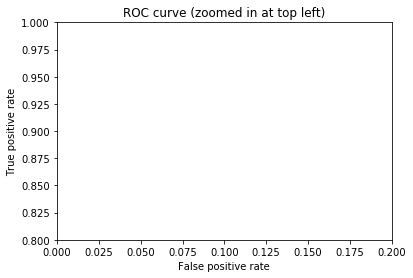

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
#rf = RandomForestClassifier(max_depth=3, n_estimators=10)
#rf.fit(X_train, y_train)

#y_pred_rf = rf.predict_proba(X_test)[:, 1]
#fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
#auc_rf = auc(fpr_rf, tpr_rf)
#plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))



import matplotlib
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.plot(fpr_keras, tpr_keras)
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
#plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression (area = {:.3f})'.format(auc_lr))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
#plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression (area = {:.3f})'.format(auc_lr))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [3]:
import sys
print(sys.executable)

C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\python.exe


In [4]:
print(sys.path)

['', 'C:\\Users\\Amish\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\User\\python35.zip', 'C:\\Users\\Amish\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\User\\DLLs', 'C:\\Users\\Amish\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\User\\lib', 'C:\\Users\\Amish\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\User', 'C:\\Users\\Amish\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\User\\lib\\site-packages', 'C:\\Users\\Amish\\AppData\\Local\\Enthought\\Canopy\\edm\\envs\\User\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Amish\\.ipython']


In [21]:
import keras_metrics

Using TensorFlow backend.


In [ ]:
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.models import Sequential
from sklearn.model_selection import cross_val_score
#import keras_metrics
print("Import Worked")
def create_model():
    model=Sequential()
    
    model.add(Dense(32,input_dim=122, kernel_initializer='normal', activation='relu'))
    print('1st layer')
    #Hidden layer
    model.add(Dense(16,kernel_initializer='normal',activation='relu'))
    #OUTPUT LAYER
    print("Hidden layer")
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    
    #COMPILE MODE
    print("Output layer")
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=[keras_metrics.precision(), keras_metrics.recall()])
    return model
 
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
print("About to start estimator")   

keras_model = create_model()
history = keras_model.fit(X_train,y_train,epochs=20, batch_size=50,verbose=1)


Import Worked
About to start estimator
1st layer
Hidden layer
Output layer
Epoch 1/20
31493/31493 [==============================] - 2s 63us/step - loss: 8.4462 - precision: 0.4641 - recall: 0.8934